<a href="https://colab.research.google.com/github/Abhi0391/Complete-Python-3-Bootcamp/blob/master/online_e_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math as m

In [ ]:
from scipy.stats import norm

In [ ]:
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
%matplotlib inline

**Features Description**

● User_ID: User ID

● Product_ID: Product ID

● Gender: Sex of User

● Age: Age in bins

● Occupation: Occupation(Masked)

● City_Category: Category of the City (A,B,C)

● StayInCurrentCityYears: Number of years stay in current city

● Marital_Status: Marital Status

● ProductCategory: Product Category (Masked)

● Purchase: Purchase Amount

In [ ]:
path = '/content/drive/MyDrive/CSV files/walmart_data.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.isnull().sum() / len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

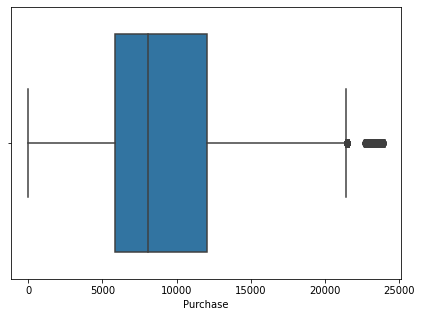

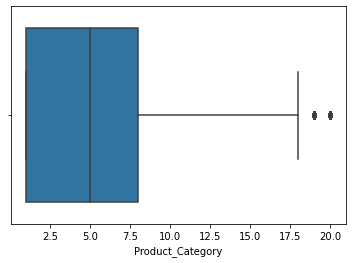

In [ ]:
plt.figure(figsize=(7,5))
plt.subplot(1,1,1)

sns.boxplot(data=df,x='Purchase')
plt.show()


sns.boxplot(data=df,x='Product_Category')
plt.show()


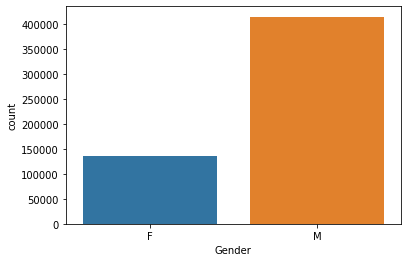

In [ ]:
sns.countplot(x='Gender',data=df)
plt.show()

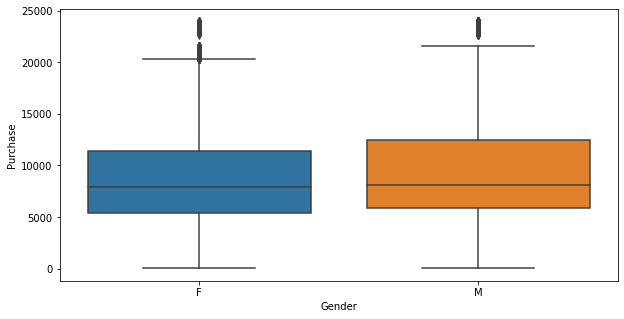

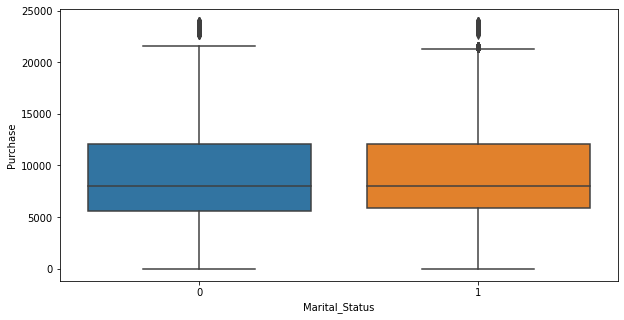

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)

sns.boxplot(x='Gender',y='Purchase',data=df)
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)

sns.boxplot(x='Marital_Status',y='Purchase',data=df)
plt.show()

### Median purchase value of male and female customer is almost equal.
### There are outliers in the purchase values of male and female customers.
### Median purchase value of married and unmarried customer is almost equal.
### There are outliers in the purchase values of married and unmarried customer.

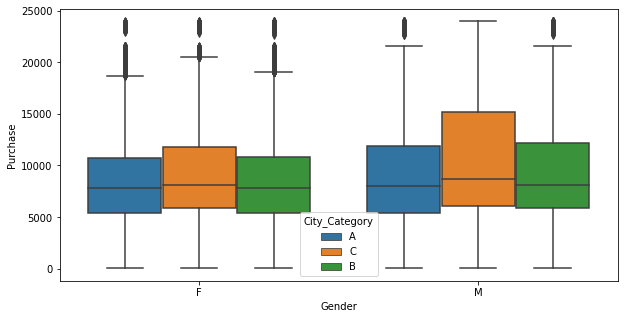

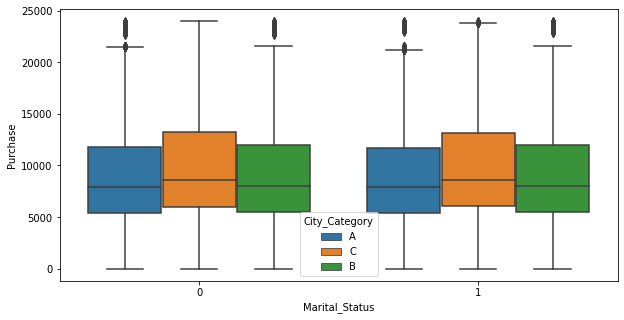

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)

sns.boxplot(x='Gender',y='Purchase',data=df,hue='City_Category')
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)

sns.boxplot(x='Marital_Status',y='Purchase',data=df,hue='City_Category')
plt.show()

In [ ]:
df.groupby('Gender')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135809.0,8734.565765,4767.233289,12.0,5433.0,7914.0,11400.0,23959.0
M,414259.0,9437.526040,5092.186210,12.0,5863.0,8098.0,12454.0,23961.0


In [ ]:
df.groupby('Marital_Status')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
0,324731.0,9265.907619,5027.347859,12.0,5605.0,8044.0,12061.0,23961.0
1,225337.0,9261.174574,5016.897378,12.0,5843.0,8051.0,12042.0,23961.0


In [ ]:
df.groupby('City_Category')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
City_Category,,,,,,,,
A,147720.0,8911.939216,4892.115238,12.0,5403.0,7931.0,11786.0,23961.0
B,231173.0,9151.300563,4955.496566,12.0,5460.0,8005.0,11986.0,23960.0
C,171175.0,9719.920993,5189.465121,12.0,6031.5,8585.0,13197.0,23961.0


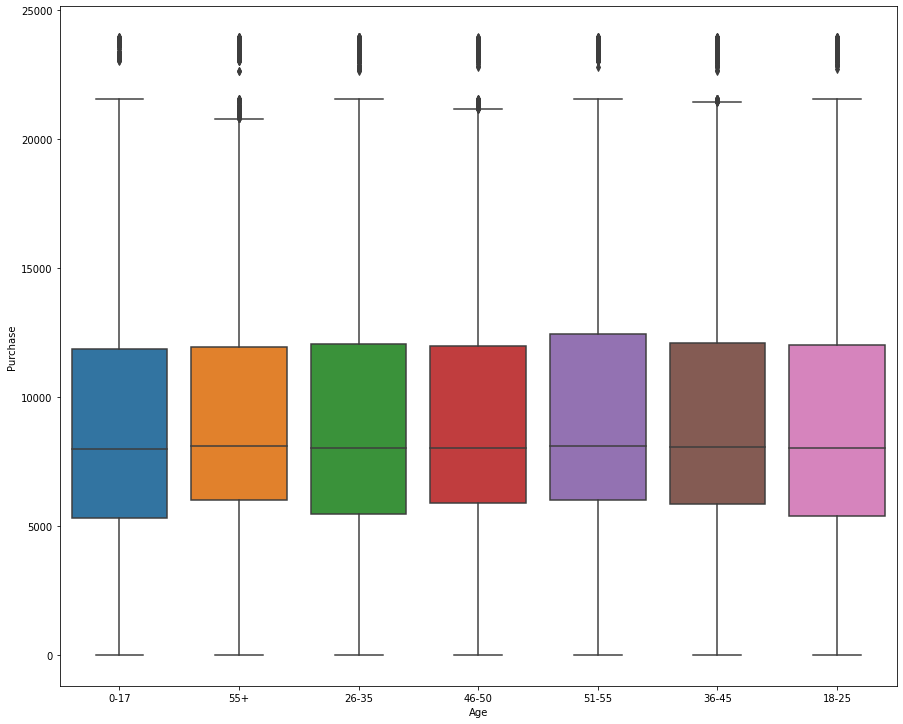

In [ ]:
plt.figure(figsize=(15,12.5))
sns.boxplot(x='Age',y='Purchase',data=df)
plt.show()


* Median expenditure of all age-groups of customer is almost same.   

* But there is outliers on the upper side in all the age-group. It might be    because there income is high.









##Finding Confidence Intervals of purchase in Male customer 

In [ ]:
df_male = df.loc[df['Gender']=='M',['Purchase']]
df_male=df_male.reset_index(drop=True)

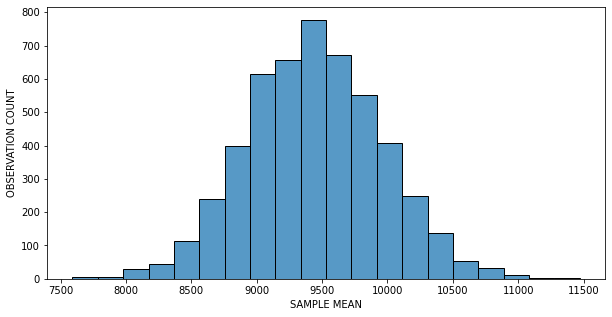

In [ ]:
sample_size = 100
total_sample = 5000
sample_mean = []
for i in range(total_sample):
  sample = df_male['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))


plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

In [ ]:
## 90 percent confidence interval

left = round(np.percentile(sample_mean,5))
right = round(np.percentile(sample_mean,95))

print("90% confident interval for Male Customer is: ",[left, right])

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Male Customer is: ",[left, right])

## 99 percent confidence interval

left = round(np.percentile(sample_mean,0.5))
right = round(np.percentile(sample_mean,99.5))

print("99% confident interval for Male Customer is: ",[left, right])

90% confident interval for Male Customer is:  [8612, 10292]
95% confident interval for Male Customer is:  [8463, 10454]
99% confident interval for Male Customer is:  [8106, 10816]


##Finding Confidence Intervals of purchase in Female customer

In [ ]:
df_female = df.loc[df['Gender']=='F',['Purchase']]
df_female=df_female.reset_index(drop=True)


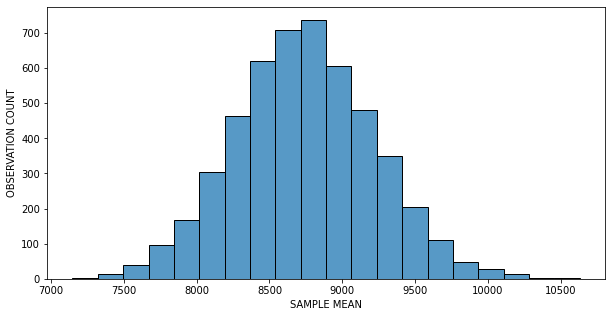

In [ ]:
sample_size = 100
total_sample = 5000
sample_mean = []
for i in range(total_sample):
  sample = df_female['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

In [ ]:
## 90 percent confidence interval

left = round(np.percentile(sample_mean,5))
right = round(np.percentile(sample_mean,95))

print("90% confident interval for Female Customer is: ",[left, right])

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Female Customer is: ",[left, right])

## 99 percent confidence interval

left = round(np.percentile(sample_mean,0.5))
right = round(np.percentile(sample_mean,99.5))

print("99% confident interval for Female Customer is: ",[left, right])

90% confident interval for Female Customer is:  [7958, 9531]
95% confident interval for Female Customer is:  [7812, 9705]
99% confident interval for Female Customer is:  [7528, 10063]


### 90% confident interval for Male Customer is:  [8611, 10302]
### 90% confident interval for Female Customer is:  [7962, 9546]

### 95% confident interval for Male Customer is:  [8475, 10460]
### 95% confident interval for Female Customer is:  [7810, 9710]

### 99% confident interval for Male Customer is:  [8185, 10823]
### 99% confident interval for Female Customer is:  [7555, 10016]

### The CLT of male and female custome is overlapping but it is not full overlap. There are significant value difference is there. So, we can suggest there is statistical difference between male and femal customers.

###Finding confidence interval of purchase in Married Customer

In [ ]:
df_Married = df.loc[df['Marital_Status']==1,['Purchase']]
df_Married=df_Married.reset_index(drop=True)

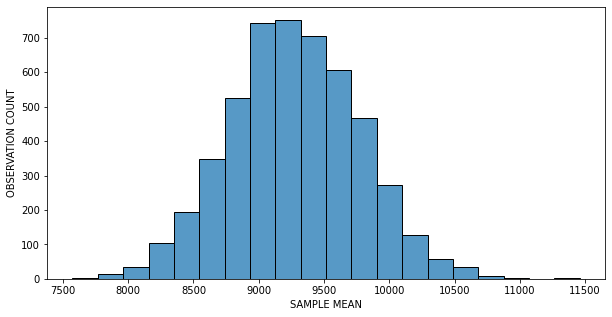

In [ ]:
sample_size = 100
total_sample = 5000
sample_mean = []
for i in range(total_sample):
  sample = df_Married['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))


plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

In [ ]:
## 90 percent confidence interval

left = round(np.percentile(sample_mean,5))
right = round(np.percentile(sample_mean,95))

print("90% confident interval for Married Customer is: ",[left, right])

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Married Customer is: ",[left, right])

## 99 percent confidence interval

left = round(np.percentile(sample_mean,0.5))
right = round(np.percentile(sample_mean,99.5))

print("99% confident interval for Married Customer is: ",[left, right])

90% confident interval for Married Customer is:  [8458, 10080]
95% confident interval for Married Customer is:  [8312, 10239]
99% confident interval for Married Customer is:  [8050, 10576]


###Finding confidence interval of purchase in Married Customer

In [ ]:
df_Unmarried = df.loc[df['Marital_Status']==0,['Purchase']]
df_Unmarried=df_Unmarried.reset_index(drop=True)

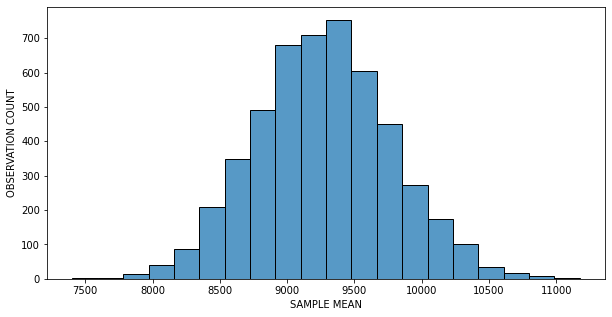

In [ ]:
sample_size = 100
total_sample = 5000
sample_mean = []
for i in range(total_sample):
  sample = df_Unmarried['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))


plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

In [ ]:
## 90 percent confidence interval

left = round(np.percentile(sample_mean,5))
right = round(np.percentile(sample_mean,95))

print("90% confident interval for Un-Married Customer is: ",[left, right])

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Un-Married Customer is: ",[left, right])

## 99 percent confidence interval

left = round(np.percentile(sample_mean,0.5))
right = round(np.percentile(sample_mean,99.5))

print("99% confident interval for Un-Married Customer is: ",[left, right])

90% confident interval for Un-Married Customer is:  [8443, 10128]
95% confident interval for Un-Married Customer is:  [8305, 10281]
99% confident interval for Un-Married Customer is:  [7995, 10610]


### 90% confident interval for Married Customer is:  [8457, 10097]
### 90% confident interval for Un-Married Customer is:  [8446, 10068]

### 95% confident interval for Married Customer is:  [8290, 10244]
### 95% confident interval for Un-Married Customer is:  [8308, 10242]

### 99% confident interval for Married Customer is:  [8067, 10568]
### 99% confident interval for Un-Married Customer is:  [7965, 10586]

### Looking at the 90%, 95%, 99% confidence interval data we can say there is no statistical significant in married and un-married customer purchase habits.

In [ ]:
df.groupby('Age')['Purchase'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
0-17,15102.0,8933.464640,5111.114046,12.0,5328.0,7986.0,11874.0,23955.0
18-25,99660.0,9169.663606,5034.321997,12.0,5415.0,8027.0,12028.0,23958.0
26-35,219587.0,9252.690633,5010.527303,12.0,5475.0,8030.0,12047.0,23961.0
36-45,110013.0,9331.350695,5022.923879,12.0,5876.0,8061.0,12107.0,23960.0
46-50,45701.0,9208.625697,4967.216367,12.0,5888.0,8036.0,11997.0,23960.0
51-55,38501.0,9534.808031,5087.368080,12.0,6017.0,8130.0,12462.0,23960.0
55+,21504.0,9336.280459,5011.493996,12.0,6018.0,8105.5,11932.0,23960.0


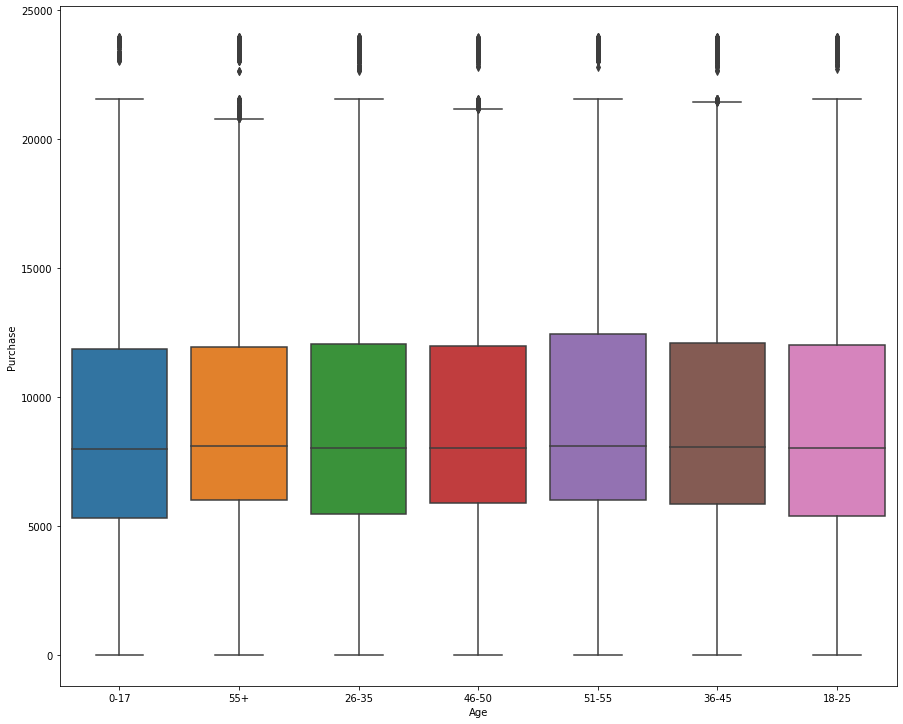

In [ ]:
plt.figure(figsize=(15,12.5))
sns.boxplot(x='Age',y='Purchase',data=df)
plt.show()

### Median values of purchase habit among all age bracket is almost samez.
### All the age brackets have some outliers looking at the above box plot.

In [ ]:
df['Age'].replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[0,1,2,3,4,5,6],inplace=True)

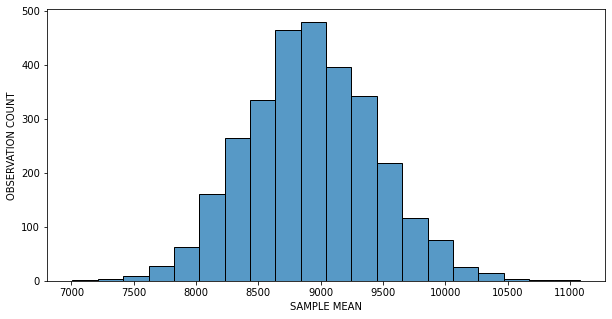

95% confident interval for Age(0-17) Customer is:  [7948, 9959]


In [ ]:
df_Age0 = df.loc[df['Age']==0,['Purchase']]
df_Age0=df_Age0.reset_index(drop=True)
sample_size = 100
total_sample =3000
sample_mean = []
for i in range(total_sample):
  sample = df_Age0['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Age(0-17) Customer is: ",[left, right])

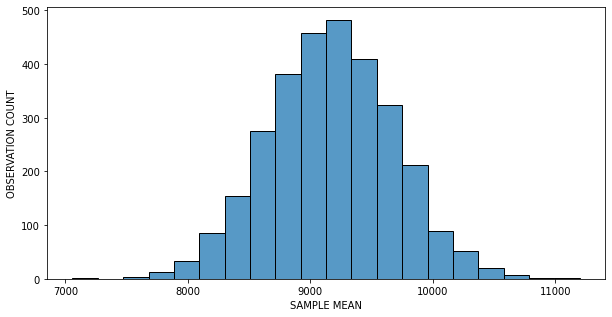

95% confident interval for Age(18-25) Customer is:  [8178, 10177]


In [ ]:
df_Age1 = df.loc[df['Age']==1,['Purchase']]
df_Age1=df_Age1.reset_index(drop=True)
sample_size = 100
total_sample =3000
sample_mean = []
for i in range(total_sample):
  sample = df_Age1['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Age(18-25) Customer is: ",[left, right])

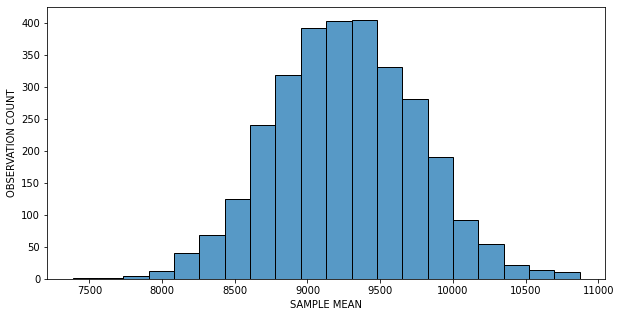

95% confident interval for Age(26-35) Customer is:  [8333, 10225]


In [ ]:
df_Age2 = df.loc[df['Age']==2,['Purchase']]
df_Age2=df_Age2.reset_index(drop=True)
sample_size = 100
total_sample =3000
sample_mean = []
for i in range(total_sample):
  sample = df_Age2['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Age(26-35) Customer is: ",[left, right])

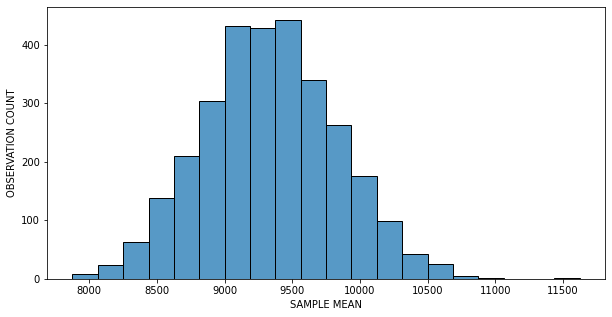

95% confident interval for Age(36-45) Customer is:  [8390, 10310]


In [ ]:
df_Age3 = df.loc[df['Age']==3,['Purchase']]
df_Age3=df_Age3.reset_index(drop=True)
sample_size = 100
total_sample =3000
sample_mean = []
for i in range(total_sample):
  sample = df_Age3['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Age(36-45) Customer is: ",[left, right])

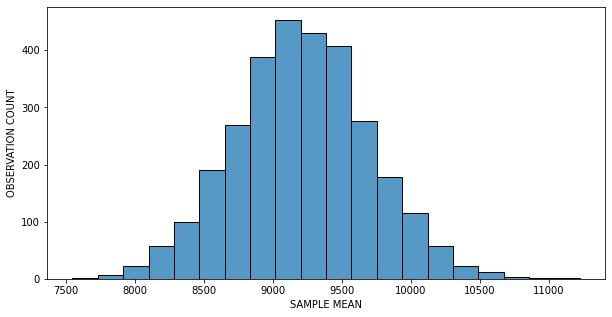

95% confident interval for Age(46-50) Customer is:  [8248, 10187]


In [ ]:
df_Age4 = df.loc[df['Age']==4,['Purchase']]
df_Age4=df_Age4.reset_index(drop=True)
sample_size = 100
total_sample =3000
sample_mean = []
for i in range(total_sample):
  sample = df_Age4['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Age(46-50) Customer is: ",[left, right])

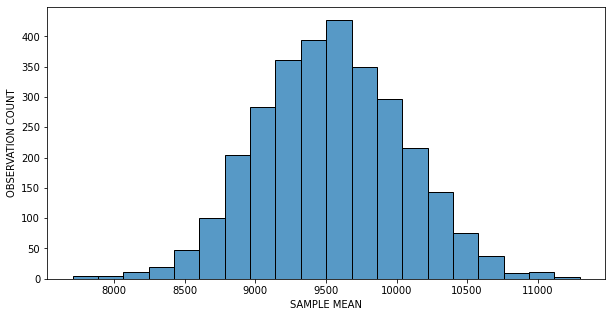

95% confident interval for Age(51-55) Customer is:  [8562, 10547]


In [ ]:
df_Age5 = df.loc[df['Age']==5,['Purchase']]
df_Age5 = df_Age5.reset_index(drop=True)
sample_size = 100
total_sample =3000
sample_mean = []
for i in range(total_sample):
  sample = df_Age5['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Age(51-55) Customer is: ",[left, right])

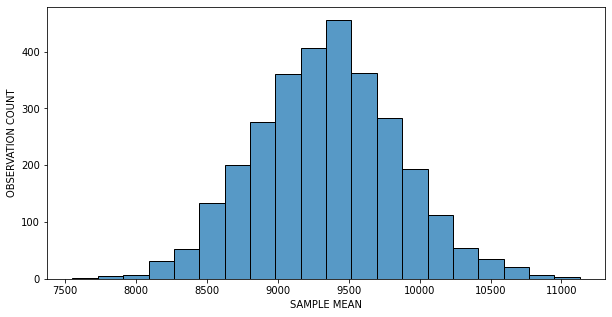

95% confident interval for Age(55+) Customer is:  [8387, 10355]


In [ ]:
df_Age6 = df.loc[df['Age']==6,['Purchase']]
df_Age6=df_Age6.reset_index(drop=True)
sample_size = 100
total_sample =3000
sample_mean = []
for i in range(total_sample):
  sample = df_Age6['Purchase'].sample(sample_size)
  sample_mean.append(round(sample.mean(),2))

plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.histplot(sample_mean,bins=20)
plt.xlabel("SAMPLE MEAN")
plt.ylabel("OBSERVATION COUNT")
plt.show()

## 95 percent confidence interval

left = round(np.percentile(sample_mean,2.5))
right = round(np.percentile(sample_mean,97.5))

print("95% confident interval for Age(55+) Customer is: ",[left, right])

95% confident interval for Age(0-17) Customer is:  [7945, 9956]

95% confident interval for Age(18-25) Customer is:  [8188, 10168]

95% confident interval for Age(26-35) Customer is:  [8284, 10245]

95% confident interval for Age(36-45) Customer is:  [8389, 10340]

95% confident interval for Age(46-50) Customer is:  [8237, 10182]

95% confident interval for Age(55+) Customer is:  [8365, 10271]



*   Leaving the age bracket 0-17 years all the age group purchase habit has no  statistical significant looking at the 95% confidence interval.








### Recommendation

### Male customers buy more purchase compare to female customers.
### Increase the sale for female customers.Company can give discount to female customers.
### City C purchase median value is more comparable to city A and city B and outlier is also very less. We can try to find the tactics of marketing team from the city and apply in other cities.
